**Random Forest**

**About the data:** 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
**Problem Statement:**
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
# Random Forest Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Load the dataset
df = pd.read_csv('/content/Company_Data.csv')
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.shape

(400, 11)

In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 85.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 27.8% of the points cannot be placed; y

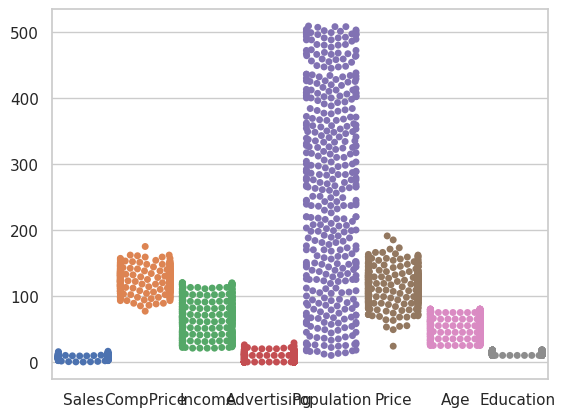

In [7]:
#Visualization
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.swarmplot(data=df)

<ipython-input-8-ca2eb8add366>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

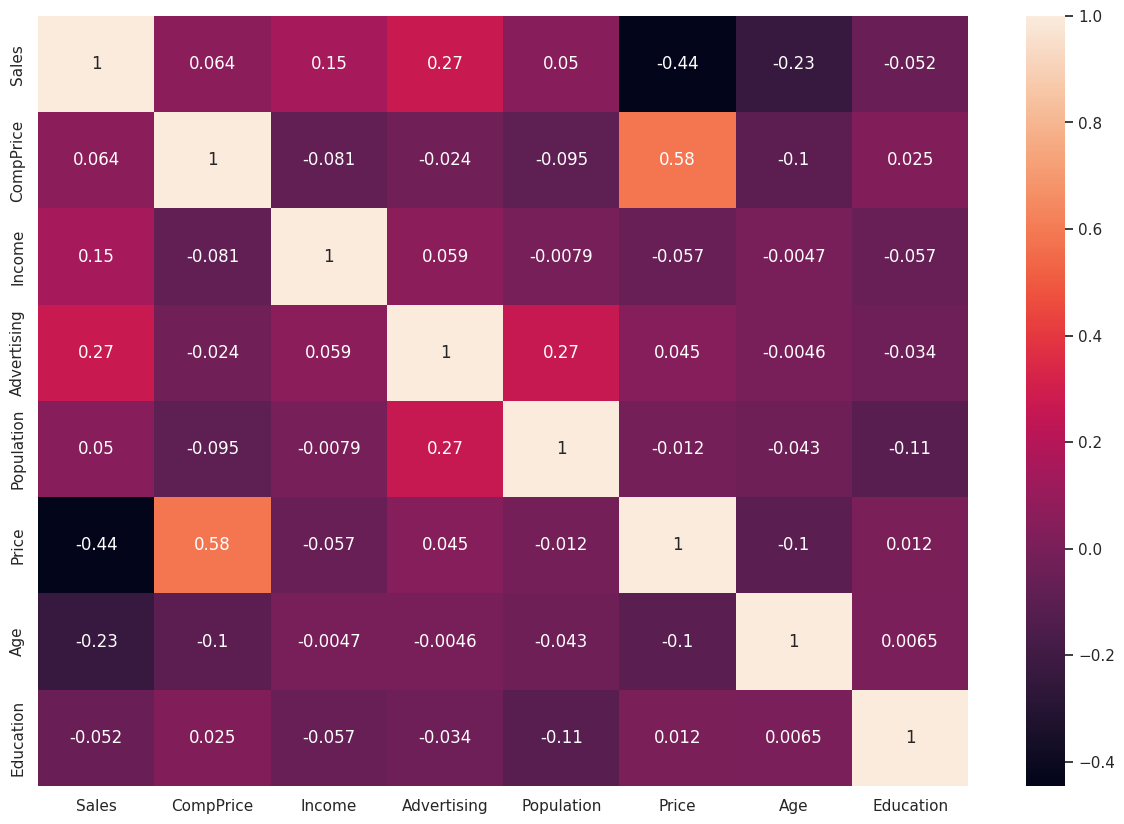

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [9]:
numerical_feature = df.describe(include=["int64", "float64"]).columns
print(list(numerical_feature))

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


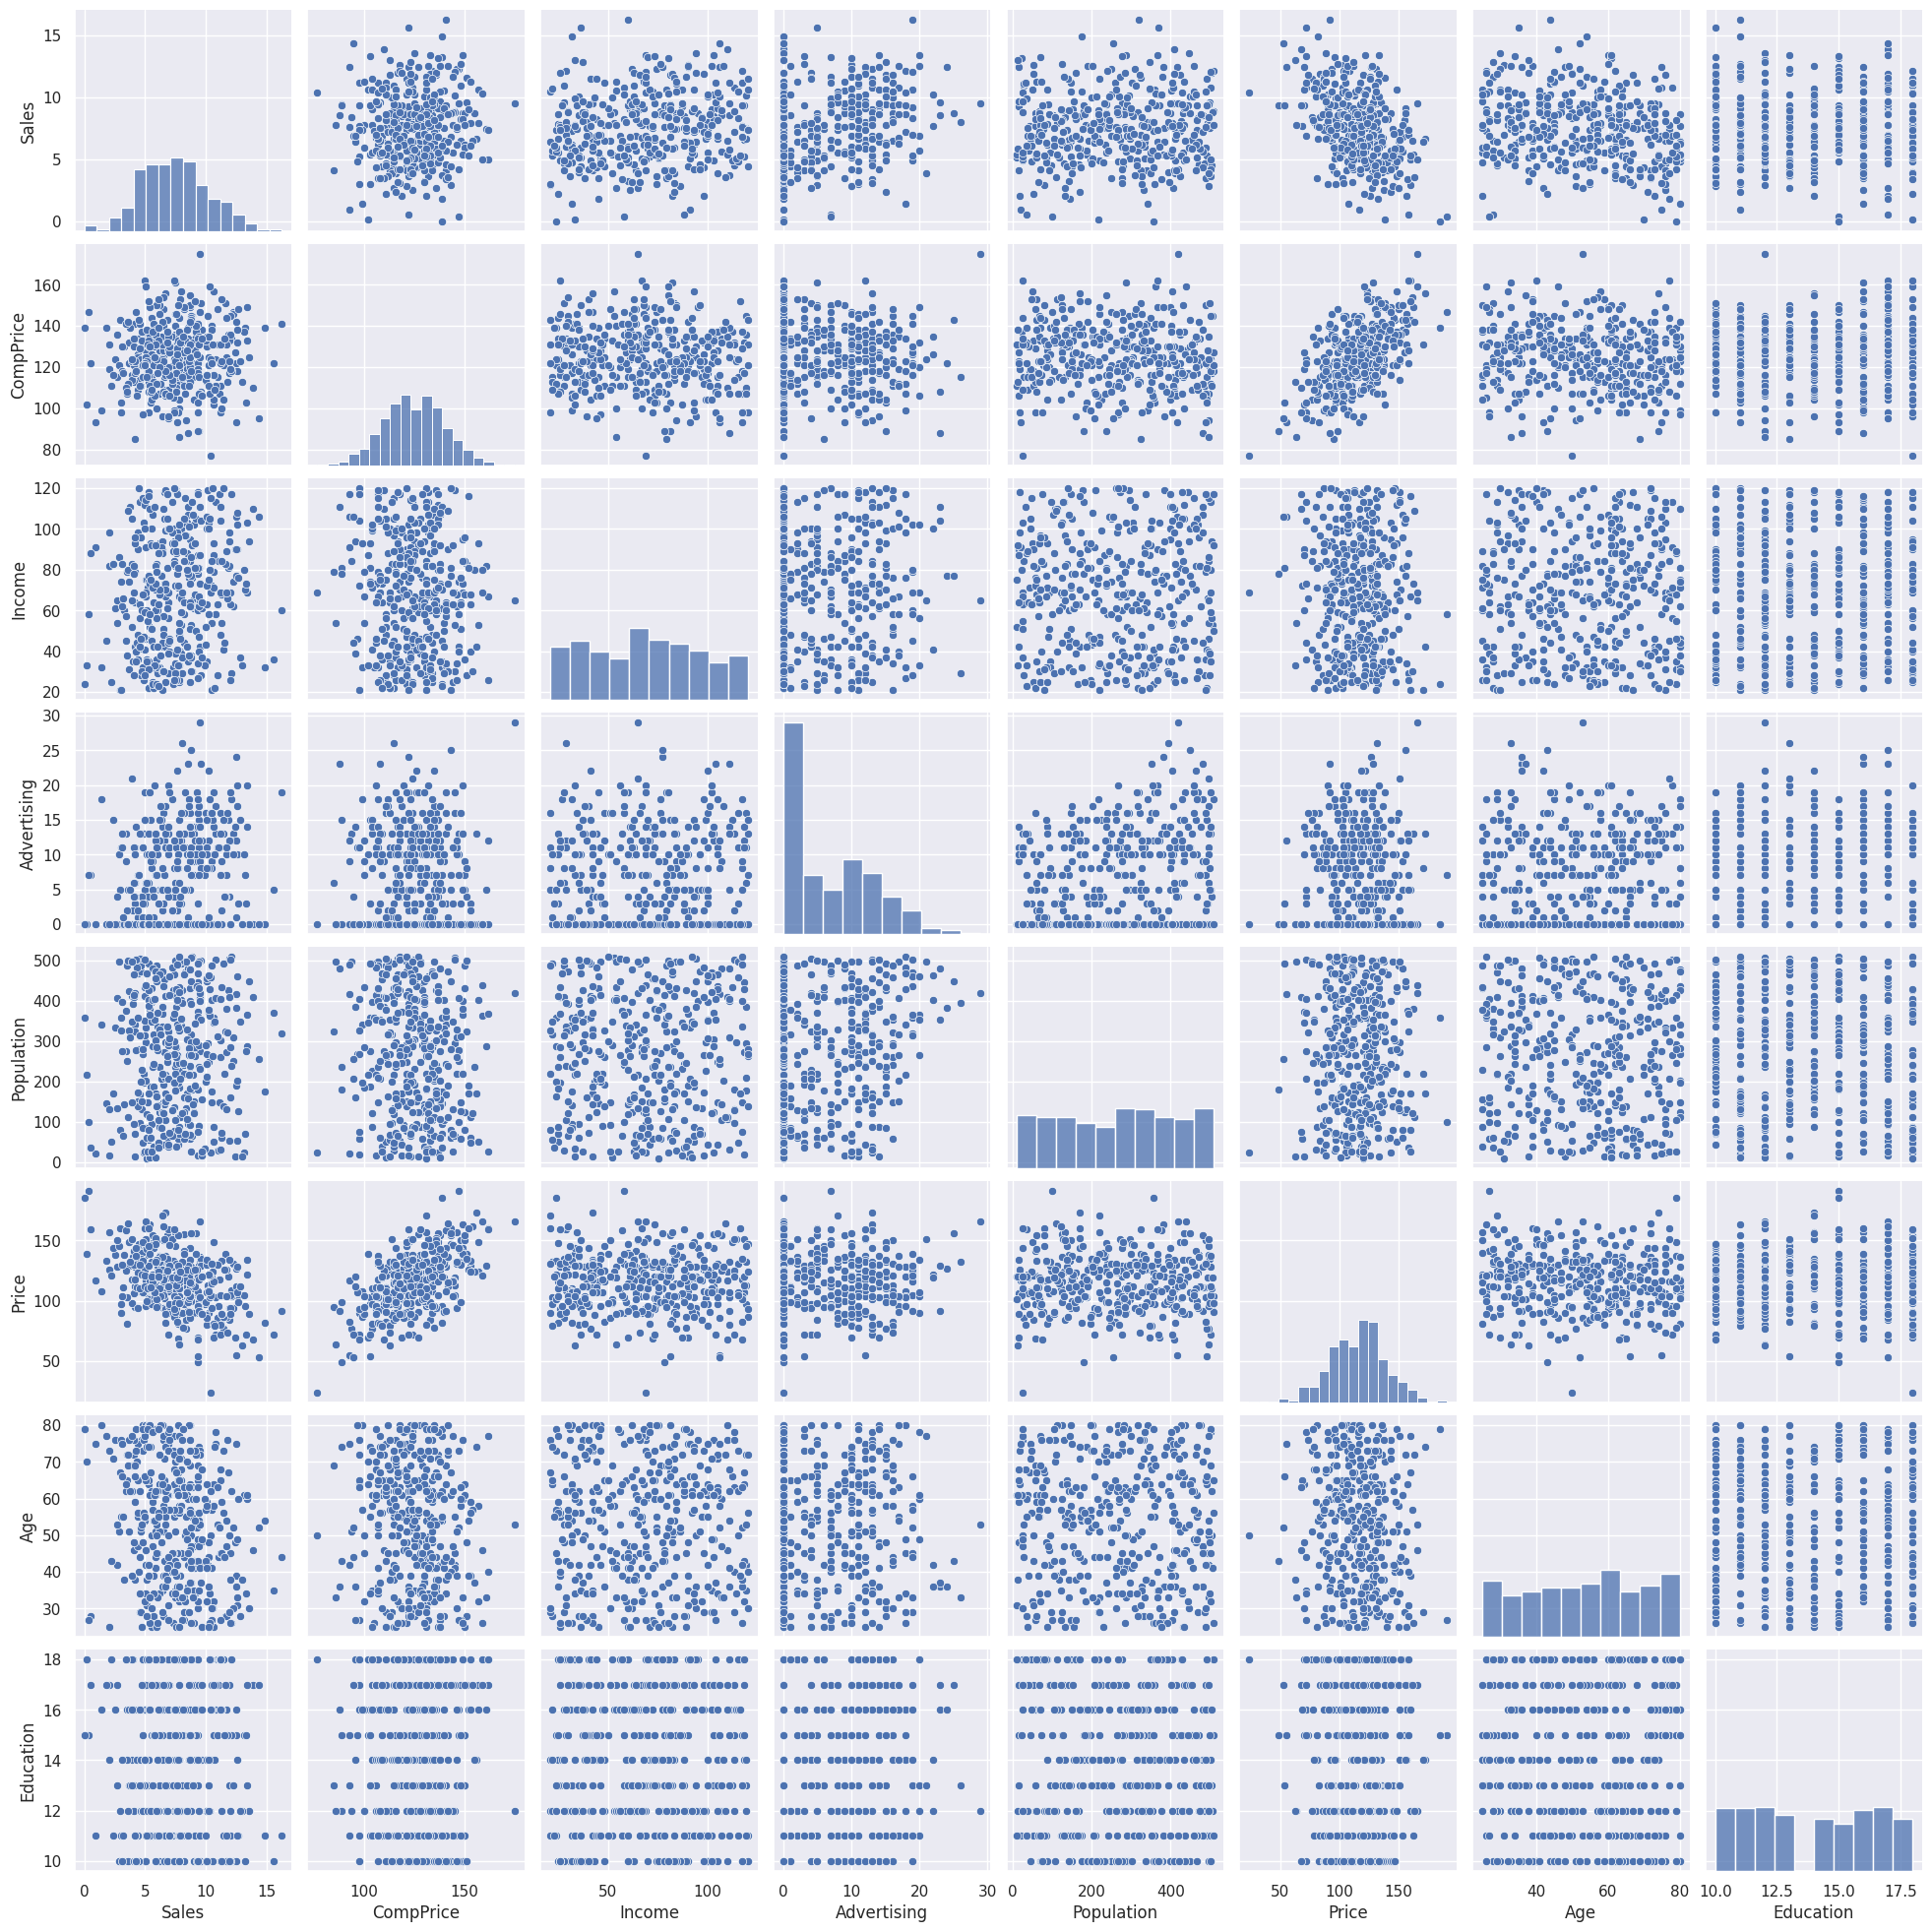

In [10]:
sns.set_style('darkgrid')
sns.pairplot(df[numerical_feature])
plt.show()

In [11]:
categorical_feature = df.describe(include=["object"]).columns
print(list(categorical_feature))

['ShelveLoc', 'Urban', 'US']


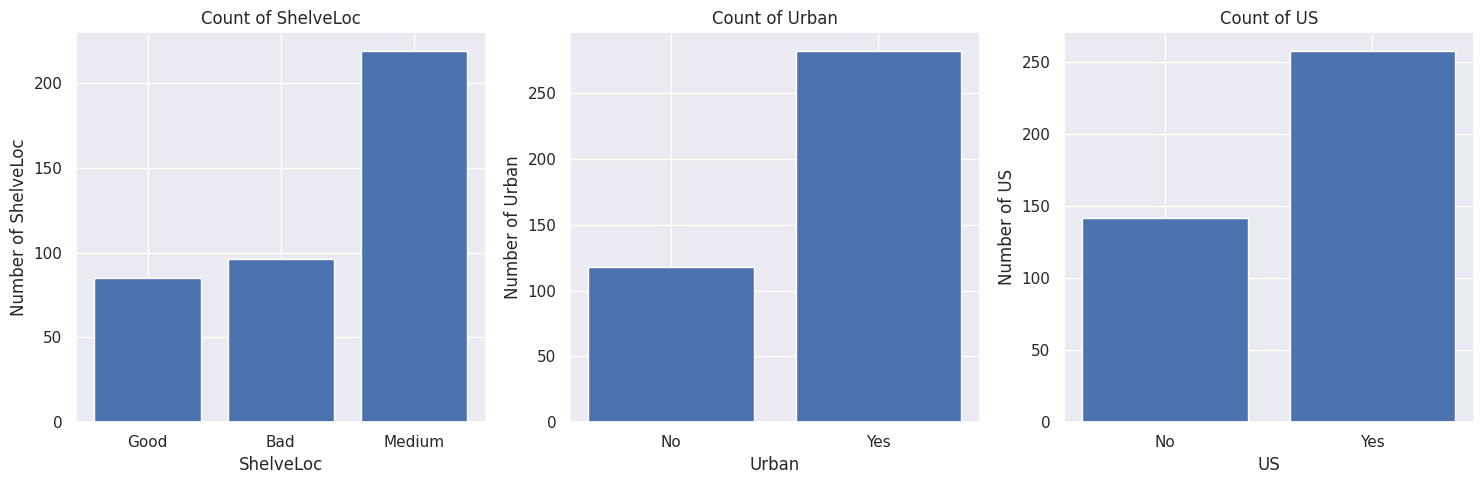

In [12]:
plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df1 = df.copy()
    unique = df[column].value_counts(ascending=True);
 
    plt.subplot(1, 3, idx+1)    
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    
plt.tight_layout()
plt.show()

In [13]:
def distplot(param):
    plt.figure(figsize=(20,15))
    sns.distplot(df[param], color = "red", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

<ipython-input-13-1e9ab3a5ab9b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], color = "red", hist_kws={"rwidth":0.80, 'alpha':1.0})


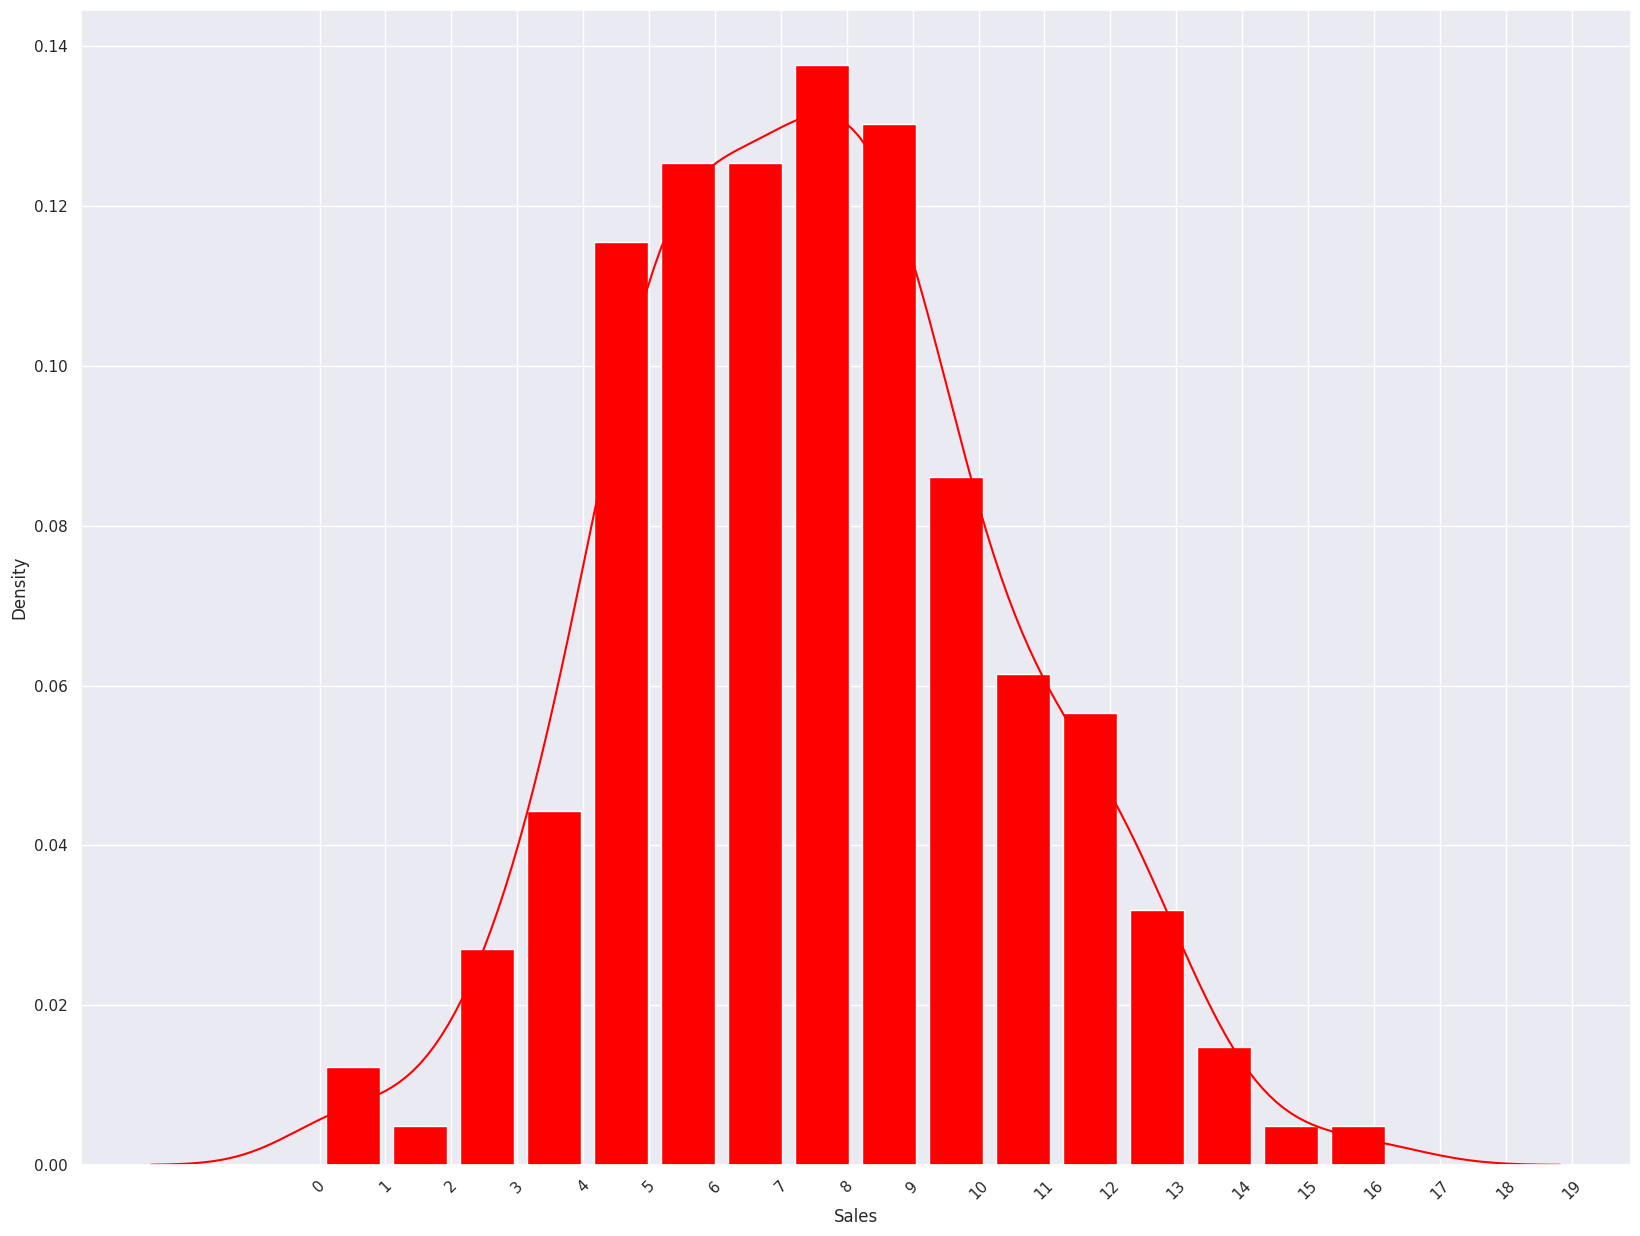

In [14]:
distplot('Sales')

<ipython-input-15-db426c73d5bf>:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df2.corrwith(df.Sales)


Text(0.5, 1.0, 'Correlation with Sales')

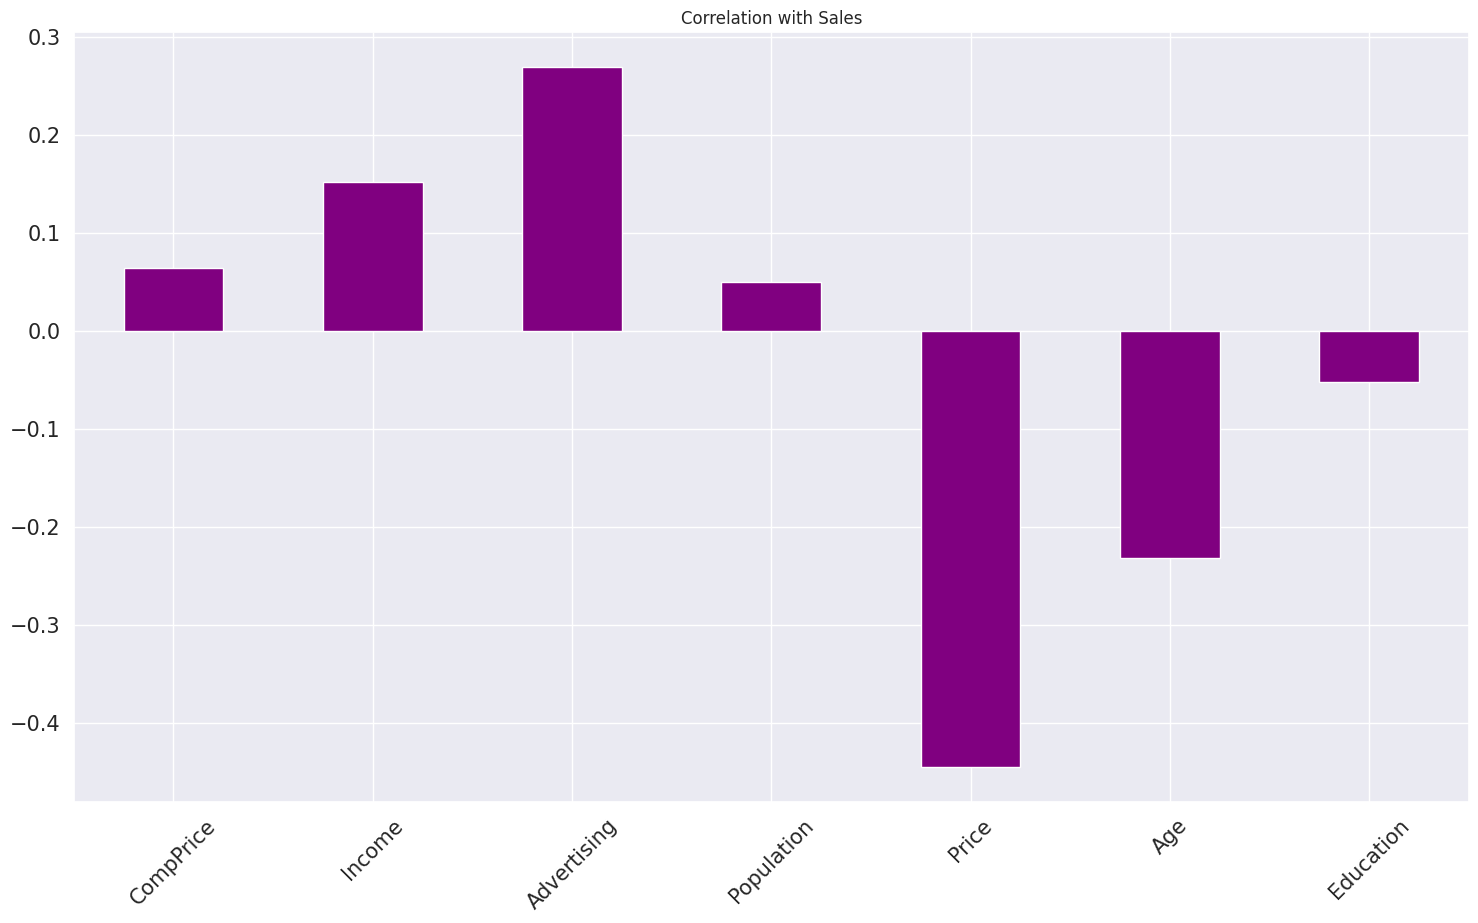

In [15]:
df2 = df.iloc[:,1:]

correlations = df2.corrwith(df.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'purple',
        rot = 45, grid = True)
plt.title('Correlation with Sales')

In [16]:
#Changing the categorical variable into dummies
df2 = pd.get_dummies(df)

In [17]:
#Converting the Target Variable i.e.Sales into Categorical
df2['Category'] = pd.cut(df2['Sales'], 
                        bins=[0,10, np.inf], 
                        labels=['Average','High'],
                        include_lowest=True)
df2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Category
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,Average
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Average
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,Average
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,Average
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,Average


In [18]:
#Random Forest Classifier
array = df2.values
X = array[:,1:15]
Y = array[:,15]

In [19]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean()*100)

87.75


Use **Random Fores**t to prepare a **model on fraud data** 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [21]:
#load the dataset
fraud = pd.read_csv('/content/Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


**EDA**

In [22]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [23]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [24]:
fraud.shape

(600, 6)

In [25]:
fraud.T

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
Undergrad,NO,YES,NO,YES,NO,NO,NO,YES,NO,YES,...,NO,YES,YES,NO,NO,YES,YES,NO,YES,NO
Marital.Status,Single,Divorced,Married,Single,Married,Divorced,Divorced,Single,Single,Divorced,...,Married,Single,Single,Divorced,Married,Divorced,Divorced,Divorced,Married,Divorced
Taxable.Income,68833,33700,36925,50190,81002,33329,83357,62774,83519,98152,...,43018,27394,68152,84775,47364,76340,69967,47334,98592,96519
City.Population,50047,134075,160205,193264,27533,116382,80890,131253,102481,155482,...,85195,132859,75143,131963,97526,39492,55369,154058,180083,158137
Work.Experience,10,18,30,15,28,0,8,3,12,4,...,14,18,16,10,9,7,2,0,17,16
Urban,YES,YES,YES,YES,NO,NO,YES,YES,YES,YES,...,YES,YES,NO,YES,YES,YES,YES,YES,NO,NO


<Axes: >

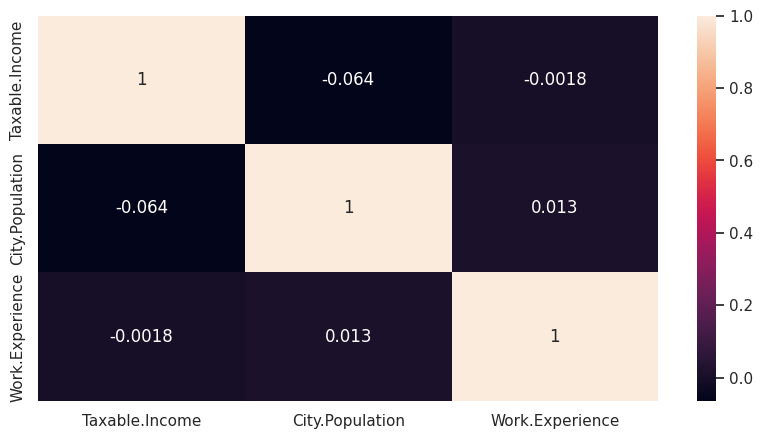

In [26]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(fraud.corr(),annot=True)

In [27]:
def distplot(param):
    plt.figure(figsize=(20,15))
    sns.distplot(fraud[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

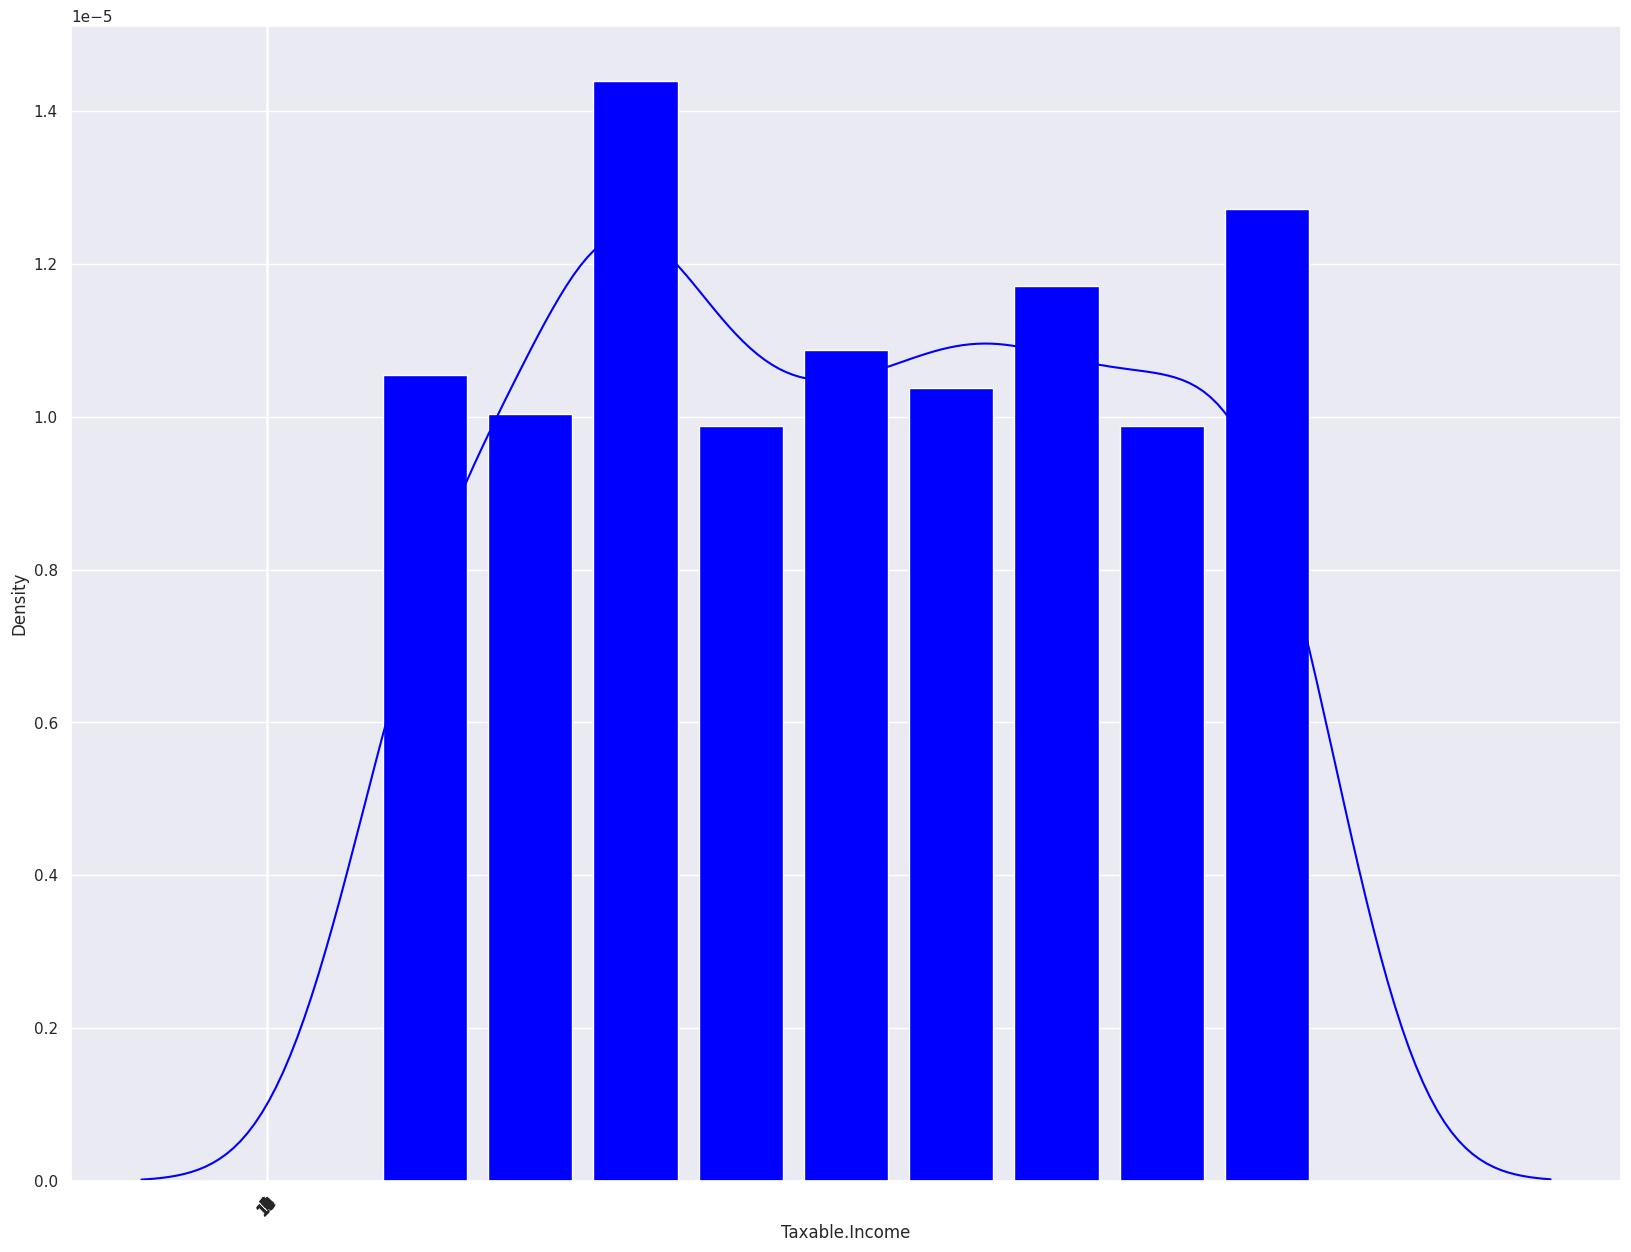

In [28]:
distplot('Taxable.Income')

In [29]:
#Changing the categorical variables into dummies
fraud1 = pd.get_dummies(fraud)

In [30]:
#Converting the target variable i.e. Sales into Catergorical
fraud1['Category'] = pd.cut(fraud1['Taxable.Income'], 
                        bins=[0,30000, np.inf], 
                        labels=['Risky','Good'],
                        include_lowest=True)
print(fraud1)

     Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0             68833            50047               10             1   
1             33700           134075               18             0   
2             36925           160205               30             1   
3             50190           193264               15             0   
4             81002            27533               28             1   
..              ...              ...              ...           ...   
595           76340            39492                7             0   
596           69967            55369                2             0   
597           47334           154058                0             1   
598           98592           180083               17             0   
599           96519           158137               16             1   

     Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0                0                        0                       0   
1    

In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
type_ = ["Medium", "Low", "High"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=fraud['Taxable.Income'].value_counts(), name="Taxable.Income"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sales Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Taxable.Income', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [32]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
array = fraud1.values
X = array[:,1:10]
Y = array[:,10]

In [33]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(round(results.mean()*100,2))

73.5
